# Jupyter notebook - project #1 Data Science Programming

## Gaussian Distribution

I want to make a code which displays an image's pixel as a histogram. This is inspired by [Andrei Kaschka\'s](https://github.com/anvaka) [Gaussian distribution example](https://github.com/anvaka/gauss-distribution). This is a gaussian distribution of Gauss which the author has coded using javascript :) I would like to do something similar with MRI images in the future, for now, I'll start with plotting the histogram of the images.
***

 ![Gauss](https://i.redd.it/t3v8bbuquh801.gif)
 ***

This is a histogram of a given image. The code uses interpolation function to animate the movement of the pixels, to do the easing in and out, which I will try later on. The simple interpolation formula is $$y-y_1 = \dfrac {y_2-y_1}{x_2-x_1}(x-x_1)$$

What I will do for this assignemt is, take a structural MRI (3D) image and get the histogram of the image.
***

## Code
MRI code reference and data, courtesy: [nibabel documentation](http://nipy.org/nibabel/coordinate_systems.html)

In [50]:
# All imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import nibabel as nb

In [51]:

# get example data
data_path = '/Users/ragotham/Box Sync/OHSU_Work/Courses/Winter2018/Data_science_Programming/Projects/mri_data'
ex_file = os.path.join(data_path, 'someones_anatomy.nii.gz')

In [52]:
img = nb.load(ex_file)
img_dim = img.shape # dimensions of the example nifti image
print("Image dimension: ",img_dim)
img_data = img.get_data()

Image dimension:  (57, 67, 56)


In [53]:
# Function to view row of MRI slices
def show_slices(slices):
    fig, axes = plt.subplots(2,len(slices)) 
    for i, slice in enumerate(slices):
        # plot the image
        axes[0,i].imshow(slice.T, cmap="gray", origin="lower" )
        # plot the histogram
        axes[1,i].hist(slice.T.ravel(),bins=256,range=(np.amin(slice.T),np.amax(slice.T)));

Maximum voxel intensities:  [90.916075140237808, 85.981648534536362, 90.563616096973419]
Minimum voxel intensities:  [6.6783638000488281, 7.3832818865776062, 7.3832818865776062]


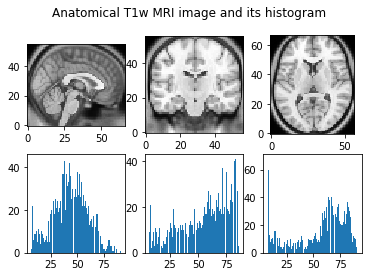

In [58]:
# plot and view the MRI anatomical image for particular slices,
# about centre of the brain in each plane of view saggital, coronal, axial
slice_sg = img_data[28,:,:]
slice_cr = img_data[:,33,:]
slice_ax = img_data[:,:,28]
show_slices([slice_sg,slice_cr,slice_ax])
plt.suptitle("Anatomical T1w MRI image and its histogram")
print("Maximum voxel intensities: ",[np.amax(slice_sg),np.amax(slice_cr),np.amax(slice_ax)]) 
print("Minimum voxel intensities: ",[np.amin(slice_sg),np.amin(slice_cr),np.amin(slice_ax)])

## Histogram of the image 

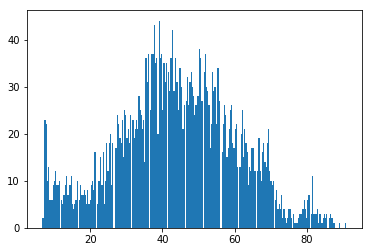

In [55]:
plt.hist(slice_sg.ravel(),bins=256,range=(np.amin(slice_sg),np.amax(slice_sg)));
    

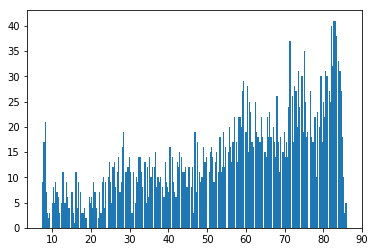

In [56]:
plt.hist(slice_cr.ravel(),bins=256,range=(np.amin(slice_cr),np.amax(slice_cr)));

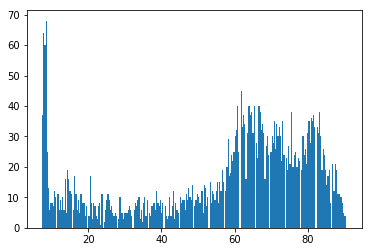

In [57]:
plt.hist(slice_ax.ravel(),bins=256,range=(np.amin(slice_ax),np.amax(slice_ax)));